In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D 
import seaborn as sns


In [2]:
# save df_data as behav_df_cleaned_new.csv
df_data = pd.read_csv('C:/Users/qmoreau/Documents/Work/Beta_bursts/Behavioral/behav_df_cleaned_new.csv')

df_data_group0 = df_data[df_data['group'] == 'Implicit']
df_data_group1 = df_data[df_data['group'] == 'Explicit']

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/qmoreau/Documents/Work/Beta_bursts/Behavioral/behav_df_cleaned_new.csv'

In [3]:
df_data

,subject,group,block,trial,trial_coherence,trial_perturb,trial_type,reach_dur,reach_rt,trial_directions,...,reach_real_angle,true_target_angle,coh_cat,perturb_cat,reach_vis_angle,reach_vis_err,reach_vis_abs_err,aim_vis_angle,aim_vis_err,aim_vis_abs_err
0,sub-101,Explicit,0,0,0.0,0.0,0,0.058329,0.483496,0,...,36.243775,60.0,zero,0.0,36.243775,23.756225,23.756225,48.930009,11.069991,11.069991
1,sub-101,Explicit,0,1,0.0,0.0,0,0.049986,0.441427,0,...,22.398256,30.0,zero,0.0,22.398256,7.601744,7.601744,17.125191,12.874809,12.874809
2,sub-101,Explicit,0,2,0.0,0.0,0,0.049997,0.483497,0,...,76.963217,90.0,zero,0.0,76.963217,13.036783,13.036783,67.627467,22.372533,22.372533
3,sub-101,Explicit,0,3,0.0,0.0,0,0.050007,0.500159,0,...,80.695139,90.0,zero,0.0,80.695139,9.304861,9.304861,69.827323,20.172677,20.172677
4,sub-101,Explicit,0,4,0.0,0.0,0,0.050015,0.408428,0,...,16.098772,30.0,zero,0.0,16.098772,13.901228,13.901228,19.496198,10.503802,10.503802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16571,sub-145,Explicit,7,51,0.0,0.0,2,0.050015,0.591832,0,...,89.996736,90.0,zero,0.0,89.996736,0.003264,0.003264,95.546031,-5.546031,5.546031
16572,sub-145,Explicit,7,52,0.0,0.0,2,0.050008,0.291736,0,...,99.338096,90.0,zero,0.0,99.338096,-9.338096,9.338096,110.125616,-20.125616,20.125616
16573,sub-145,Explicit,7,53,0.0,0.0,2,0.050027,0.375074,0,...,93.263702,90.0,zero,0.0,93.263702,-3.263702,3.263702,96.966572,-6.966572,6.966572
16574,sub-145,Explicit,7,54,0.0,0.0,2,0.050010,0.400098,0,...,44.020157,30.0,zero,0.0,44.020157,-14.020157,14.020157,55.093923,-25.093923,25.093923


In [4]:
df_data_group0_avg = df_data_group0.groupby(['subject', 'block', 'coh_cat'], as_index=False).mean(numeric_only=True)
df_data_group1_avg = df_data_group1.groupby(['subject', 'block', 'coh_cat'], as_index=False).mean(numeric_only=True)

coh_cat_order = ["zero", "low", "med", "high"]

# Convert the 'coh_cat' column to a categorical data type with the desired order
df_data_group0_avg['coh_cat'] = pd.Categorical(df_data_group0_avg['coh_cat'], categories=coh_cat_order, ordered=True)
df_data_group1_avg['coh_cat'] = pd.Categorical(df_data_group1_avg['coh_cat'], categories=coh_cat_order, ordered=True)


In [5]:
block_0_means_group0 = df_data_group0_avg['reach_vis_abs_err'][df_data_group0_avg['block'] == 0]
block_0_means_group0 = np.array(block_0_means_group0)

for i, subject in enumerate(df_data_group0_avg['subject'].unique()):
    baseline_value = block_0_means_group0[i]
    # print(subject, baseline_value)
    df_data_group0_avg.loc[df_data_group0_avg['subject'] == subject, 'reach_vis_abs_err_corrected'] = df_data_group0_avg.loc[df_data_group0_avg['subject'] == subject, 'reach_vis_abs_err'] - baseline_value

block_0_means_group1 = df_data_group1_avg['reach_vis_abs_err'][df_data_group1_avg['block'] == 0]
block_0_means_group1 = np.array(block_0_means_group1)

for i, subject in enumerate(df_data_group1_avg['subject'].unique()):
    baseline_value = block_0_means_group1[i]
    # print(subject, baseline_value)
    df_data_group1_avg.loc[df_data_group1_avg['subject'] == subject, 'reach_vis_abs_err_corrected'] = df_data_group1_avg.loc[df_data_group1_avg['subject'] == subject, 'reach_vis_abs_err'] - baseline_value

In [6]:
block_0_means_group0 = df_data_group0_avg['reach_vis_err'][df_data_group0_avg['block'] == 0]
block_0_means_group0 = np.array(block_0_means_group0)

for i, subject in enumerate(df_data_group0_avg['subject'].unique()):
    baseline_value = block_0_means_group0[i]
    # print(subject, baseline_value)
    df_data_group0_avg.loc[df_data_group0_avg['subject'] == subject, 'reach_vis_err_corrected'] = df_data_group0_avg.loc[df_data_group0_avg['subject'] == subject, 'reach_vis_err'] - baseline_value

block_0_means_group1 = df_data_group1_avg['reach_vis_err'][df_data_group1_avg['block'] == 0]
block_0_means_group1 = np.array(block_0_means_group1)

for i, subject in enumerate(df_data_group1_avg['subject'].unique()):
    baseline_value = block_0_means_group1[i]
    # print(subject, baseline_value)
    df_data_group1_avg.loc[df_data_group1_avg['subject'] == subject, 'reach_vis_err_corrected'] = df_data_group1_avg.loc[df_data_group1_avg['subject'] == subject, 'reach_vis_err'] - baseline_value

In [7]:
# Baseline Error Values

df_data_group0_avg_trial = df_data_group0.groupby(['subject', 'block', 'trial'], as_index=False).mean(numeric_only=True)
df_data_group1_avg_trial = df_data_group1.groupby(['subject','block', 'trial'], as_index=False).mean(numeric_only=True)

block_0_means_group0 = df_data_group0_avg_trial['reach_vis_err'][df_data_group0_avg_trial['block'] == 0]
block_0_means_group0 = np.array(block_0_means_group0)

for i, subject in enumerate(df_data_group0_avg_trial['subject'].unique()):
    baseline_value = block_0_means_group0[i]
    # print(subject, baseline_value)
    df_data_group0_avg_trial.loc[df_data_group0_avg_trial['subject'] == subject, 'reach_vis_err_corrected'] = df_data_group0_avg_trial.loc[df_data_group0_avg_trial['subject'] == subject, 'reach_vis_err'] - baseline_value

df_data_group0_avg_trial_trial_new = df_data_group0_avg_trial.groupby(['block', 'trial'], as_index=False).mean(numeric_only=True)

block_0_means_group1 = df_data_group1_avg_trial['reach_vis_err'][df_data_group1_avg_trial['block'] == 0]
block_0_means_group1 = np.array(block_0_means_group1)

for i, subject in enumerate(df_data_group1_avg_trial['subject'].unique()):
    baseline_value = block_0_means_group1[i]
    # print(subject, baseline_value)
    df_data_group1_avg_trial.loc[df_data_group1_avg_trial['subject'] == subject, 'reach_vis_abs_err_corrected'] = df_data_group1_avg_trial.loc[df_data_group1_avg_trial['subject'] == subject, 'reach_vis_abs_err'] - baseline_value


# df_data_group1_avg_trial["reach_vis_err_corrected_abs"] = np.abs(df_data_group1_avg_trial["reach_vis_err_corrected"])
df_data_group1_avg_trial_trial_new = df_data_group1_avg_trial.groupby(['block', 'trial'], as_index=False).mean(numeric_only=True)


In [8]:
# Create a new column for trial index

df_data_group0_avg_trial_trial_new['trial_idx'] = df_data_group0_avg_trial_trial_new.groupby('block').cumcount()
df_data_group0_avg_trial_trial_new['trial_idx'] += df_data_group0_avg_trial_trial_new['block'] * (df_data_group0_avg_trial_trial_new['trial'].nunique())

df_data_group1_avg_trial_trial_new['trial_idx'] = df_data_group1_avg_trial_trial_new.groupby('block').cumcount()
df_data_group1_avg_trial_trial_new['trial_idx'] += df_data_group1_avg_trial_trial_new['block'] * (df_data_group1_avg_trial_trial_new['trial'].nunique())


In [19]:

group0_std_err = df_data_group0_avg_trial.groupby(['block', 'trial'])['reach_vis_err_corrected'].sem().values
# Calculate standard error for group 1
group1_std_err = df_data_group1_avg_trial.groupby(['block', 'trial'])['reach_vis_abs_err_corrected'].sem().values

palette0 = sns.color_palette("magma", 3)
palette1 = sns.color_palette("mako_r", 2)

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot behavior for group 0 (Errors)
axes[0].plot(df_data_group0_avg_trial_trial_new["trial_idx"], df_data_group0_avg_trial_trial_new["reach_vis_err_corrected"], marker='o', linestyle='', color=palette0[0], markersize=3)
axes[0].fill_between(df_data_group1_avg_trial_trial_new["trial_idx"], df_data_group0_avg_trial_trial_new["reach_vis_err_corrected"] - group0_std_err, df_data_group0_avg_trial_trial_new["reach_vis_err_corrected"] + group0_std_err, color=palette0[0], alpha=0.2)
axes[0].set_ylim(-40, 40)
axes[0].set_xlabel("Trials")
axes[0].set_ylabel("Target Error")
axes[0].set_title("Implicit Group")
axes[0].axhline(0, linestyle='--', color='black')  # Add horizontal line at y=0
axes[0].axvline(55, linestyle='--', color='gray')  # Add vertical line at x=55
axes[0].axvline(len(df_data_group0_avg_trial_trial_new["trial_idx"]) - 55, linestyle='--', color='gray')  # Add vertical line at xmax - 55

# Plot behavior for group 1 (Errors)
axes[1].plot(df_data_group1_avg_trial_trial_new["trial_idx"], df_data_group1_avg_trial_trial_new["reach_vis_abs_err_corrected"], marker='o', linestyle='', color=palette1[0], markersize=3)
axes[1].fill_between(df_data_group1_avg_trial_trial_new["trial_idx"], df_data_group1_avg_trial_trial_new["reach_vis_abs_err_corrected"] - group1_std_err, df_data_group1_avg_trial_trial_new["reach_vis_abs_err_corrected"] + group1_std_err, color=palette1[1], alpha=0.2)
axes[1].set_ylim(-40, 40)
axes[1].set_xlabel("Trials")
axes[1].set_ylabel("Error Magnitude")
axes[1].set_title("Explicit Group")
axes[1].axhline(0, linestyle='--', color='gray', linewidth = 0.5)  # Add horizontal line at y=0
axes[1].axvline(55, linestyle='--', color='gray', linewidth = 0.5)  # Add vertical line at x=55
axes[1].axvline(len(df_data_group1_avg_trial_trial_new["trial_idx"]) - 55, linestyle='--', color='gray', linewidth = 0.5)  # Add vertical line at xmax - 55

# add text boxes
axes[0].text(50, -37, "Baseline", fontsize=9, ha='right', va='bottom')
axes[0].text(260, -37, "Adaptation", fontsize=9, ha='right', va='bottom')
axes[0].text(465, -37, "Washout", fontsize=9, ha='right', va='bottom')

# Add text boxes
axes[1].text(50, -37, "Baseline", fontsize=9, ha='right', va='bottom')
axes[1].text(260, -37, "Adaptation", fontsize=9, ha='right', va='bottom')
axes[1].text(465, -37, "Washout", fontsize=9, ha='right', va='bottom')


# Adjust the spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()

KeyError: 'Column not found: reach_vis_abs_err_corrected'

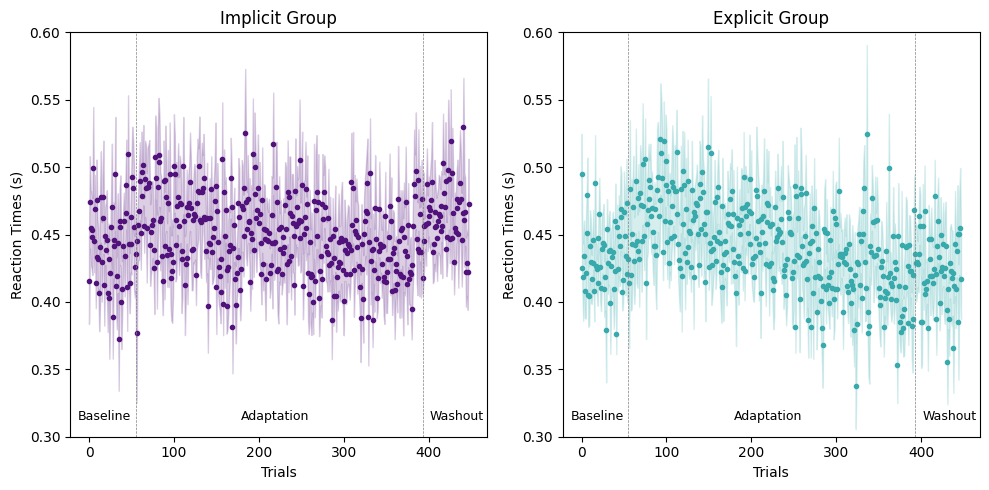

In [10]:

group0_std_err = df_data_group0_avg_trial.groupby(['block', 'trial'])['reach_rt'].sem().values
# Calculate standard error for group 1
group1_std_err = df_data_group1_avg_trial.groupby(['block', 'trial'])['reach_rt'].sem().values

palette0 = sns.color_palette("magma", 3)
palette1 = sns.color_palette("mako_r", 2)

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot behavior for group 0 (Errors)
axes[0].plot(df_data_group0_avg_trial_trial_new["trial_idx"], df_data_group0_avg_trial_trial_new["reach_rt"], marker='o', linestyle='', color=palette0[0], markersize=3)
axes[0].fill_between(df_data_group1_avg_trial_trial_new["trial_idx"], df_data_group0_avg_trial_trial_new["reach_rt"] - group0_std_err, df_data_group0_avg_trial_trial_new["reach_rt"] + group0_std_err, color=palette0[0], alpha=0.2)
axes[0].set_ylim(0.3, 0.6)
axes[0].set_xlabel("Trials")
axes[0].set_ylabel("Reaction Times (s)")
axes[0].set_title("Implicit Group")
axes[0].axvline(55, linestyle='--', color='gray', linewidth = 0.5)  # Add vertical line at x=55
axes[0].axvline(len(df_data_group1_avg_trial_trial_new["trial_idx"]) - 55, linestyle='--', color='gray', linewidth = 0.5)  # Add vertical line at xmax - 55

# Plot behavior for group 1 (Errors)
axes[1].plot(df_data_group1_avg_trial_trial_new["trial_idx"], df_data_group1_avg_trial_trial_new["reach_rt"], marker='o', linestyle='', color=palette1[0], markersize=3)
axes[1].fill_between(df_data_group1_avg_trial_trial_new["trial_idx"], df_data_group1_avg_trial_trial_new["reach_rt"] - group1_std_err, df_data_group1_avg_trial_trial_new["reach_rt"] + group1_std_err, color=palette1[0], alpha=0.2)
axes[1].set_ylim(0.3, 0.6)
axes[1].set_xlabel("Trials")
axes[1].set_ylabel("Reaction Times (s)")
axes[1].set_title("Explicit Group")
axes[1].axvline(55, linestyle='--', color='gray', linewidth = 0.5)  # Add vertical line at x=55
axes[1].axvline(len(df_data_group1_avg_trial_trial_new["trial_idx"]) - 55, linestyle='--', color='gray', linewidth = 0.5)  # Add vertical line at xmax - 55

# add text boxes
axes[0].text(50, 0.31, "Baseline", fontsize=9, ha='right', va='bottom')
axes[0].text(260, 0.31, "Adaptation", fontsize=9, ha='right', va='bottom')
axes[0].text(465, 0.31, "Washout", fontsize=9, ha='right', va='bottom')

# Add text boxes
axes[1].text(50, 0.31, "Baseline", fontsize=9, ha='right', va='bottom')
axes[1].text(260, 0.31, "Adaptation", fontsize=9, ha='right', va='bottom')
axes[1].text(465, 0.31, "Washout", fontsize=9, ha='right', va='bottom')


# Adjust the spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()

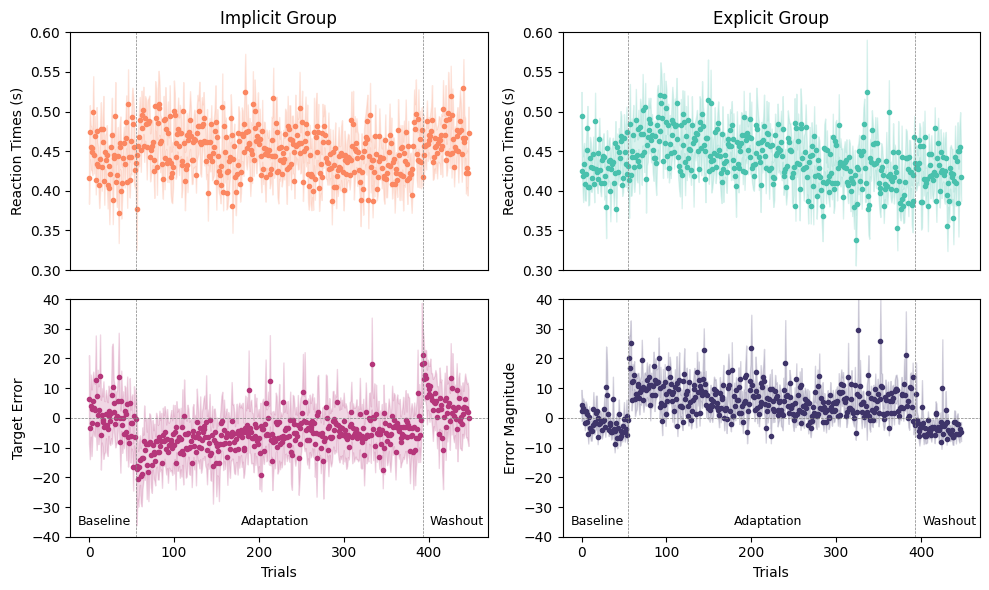

In [25]:
# Calculate standard error for group 0
group0_rt_std_err = df_data_group0_avg_trial.groupby(['block', 'trial'])['reach_rt'].sem().values
group0_vis_err_std_err = df_data_group0_avg_trial.groupby(['block', 'trial'])['reach_vis_err_corrected'].sem().values

# Calculate standard error for group 1
group1_rt_std_err = df_data_group1_avg_trial.groupby(['block', 'trial'])['reach_rt'].sem().values
group1_vis_err_std_err = df_data_group1_avg_trial.groupby(['block', 'trial'])['reach_vis_abs_err_corrected'].sem().values

palette0 = sns.color_palette("magma_r", 3)
palette1 = sns.color_palette("mako_r", 3)

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Plot behavior for group 0 (Reaction Times)
axes[0, 0].plot(df_data_group0_avg_trial_trial_new["trial_idx"], df_data_group0_avg_trial_trial_new["reach_rt"], marker='o', linestyle='', color=palette0[0], markersize=3)
axes[0, 0].fill_between(df_data_group0_avg_trial_trial_new["trial_idx"], df_data_group0_avg_trial_trial_new["reach_rt"] - group0_rt_std_err, df_data_group0_avg_trial_trial_new["reach_rt"] + group0_rt_std_err, color=palette0[0], alpha=0.2)
axes[0, 0].set_ylim(0.3, 0.6)
axes[0, 0].set_xlabel("Trials")
axes[0, 0].set_ylabel("Reaction Times (s)")
axes[0, 0].set_title("Implicit Group")
axes[0, 0].axvline(55, linestyle='--', color='gray', linewidth = 0.5)  # Add vertical line at x=55
axes[0, 0].axvline(len(df_data_group1_avg_trial_trial_new["trial_idx"]) - 55, linestyle='--', color='gray', linewidth = 0.5)  # Add vertical line at xmax - 55
axes[0, 0].set_xlabel('')
axes[0, 0].set_xticks([])

# Plot behavior for group 1 (Reaction Times)
axes[0, 1].plot(df_data_group1_avg_trial_trial_new["trial_idx"], df_data_group1_avg_trial_trial_new["reach_rt"], marker='o', linestyle='', color=palette1[0], markersize=3)
axes[0, 1].fill_between(df_data_group1_avg_trial_trial_new["trial_idx"], df_data_group1_avg_trial_trial_new["reach_rt"] - group1_rt_std_err, df_data_group1_avg_trial_trial_new["reach_rt"] + group1_rt_std_err, color=palette1[0], alpha=0.2)
axes[0, 1].set_ylim(0.3, 0.6)
axes[0, 1].set_xlabel("Trials")
axes[0, 1].set_ylabel("Reaction Times (s)")
axes[0, 1].set_title("Explicit Group")
axes[0, 1].axvline(55, linestyle='--', color='gray', linewidth = 0.5)  # Add vertical line at x=55
axes[0, 1].axvline(len(df_data_group1_avg_trial_trial_new["trial_idx"]) - 55, linestyle='--', color='gray', linewidth = 0.5)  # Add vertical line at xmax - 55
axes[0, 1].set_xlabel('')
axes[0, 1].set_xticks([])

# Plot behavior for group 0 (Error Magnitude)
axes[1, 0].plot(df_data_group0_avg_trial_trial_new["trial_idx"], df_data_group0_avg_trial_trial_new["reach_vis_err_corrected"], marker='o', linestyle='', color=palette0[1], markersize=3)
axes[1, 0].fill_between(df_data_group1_avg_trial_trial_new["trial_idx"], df_data_group0_avg_trial_trial_new["reach_vis_err_corrected"] - group0_vis_err_std_err, df_data_group0_avg_trial_trial_new["reach_vis_err_corrected"] + group0_vis_err_std_err, color=palette0[1], alpha=0.2)
axes[1, 0].set_ylim(-40, 40)
axes[1, 0].set_xlabel("Trials")
axes[1, 0].set_ylabel("Target Error")
axes[1, 0].axhline(0, linestyle='--', color='gray', linewidth = 0.5)  # Add horizontal line at y=0
axes[1, 0].axvline(55, linestyle='--', color='gray', linewidth = 0.5)  # Add vertical line at x=55
axes[1, 0].axvline(len(df_data_group1_avg_trial_trial_new["trial_idx"]) - 55, linestyle='--', color='gray', linewidth = 0.5)  # Add vertical line at xmax - 55

# add text boxes
axes[1, 0].text(50, -37, "Baseline", fontsize=9, ha='right', va='bottom')
axes[1, 0].text(260, -37, "Adaptation", fontsize=9, ha='right', va='bottom')
axes[1, 0].text(465, -37, "Washout", fontsize=9, ha='right', va='bottom')

# Plot behavior for group 1 (Error Magnitude)
axes[1, 1].plot(df_data_group1_avg_trial_trial_new["trial_idx"], df_data_group1_avg_trial_trial_new["reach_vis_abs_err_corrected"], marker='o', linestyle='', color=palette1[2], markersize=3)
axes[1, 1].fill_between(df_data_group1_avg_trial_trial_new["trial_idx"], df_data_group1_avg_trial_trial_new["reach_vis_abs_err_corrected"] - group1_vis_err_std_err, df_data_group1_avg_trial_trial_new["reach_vis_abs_err_corrected"] + group1_vis_err_std_err, color=palette1[2], alpha=0.2)
axes[1, 1].set_ylim(-40, 40)
axes[1, 1].set_xlabel("Trials")
axes[1, 1].set_ylabel("Error Magnitude")
axes[1, 1].axhline(0, linestyle='--', color='gray', linewidth = 0.5)  # Add horizontal line at y=0
axes[1, 1].axvline(55, linestyle='--', color='gray', linewidth = 0.5)  # Add vertical line at x=55
axes[1, 1].axvline(len(df_data_group1_avg_trial_trial_new["trial_idx"]) - 55, linestyle='--', color='gray', linewidth = 0.5)  # Add vertical line at xmax - 55


# add text boxes
axes[1, 1].text(50, -37, "Baseline", fontsize=9, ha='right', va='bottom')
axes[1, 1].text(260, -37, "Adaptation", fontsize=9, ha='right', va='bottom')
axes[1, 1].text(465, -37, "Washout", fontsize=9, ha='right', va='bottom')

plt.tight_layout()
# Show the combined plot
plt.show()


In [22]:
df_data_group0_avg_trial_trial_new

,block,trial,trial_coherence,trial_perturb,trial_type,reach_dur,reach_rt,trial_directions,trial_target,aim_target,...,true_target_angle,perturb_cat,reach_vis_angle,reach_vis_err,reach_vis_abs_err,aim_vis_angle,aim_vis_err,aim_vis_abs_err,reach_vis_err_corrected,trial_idx
0,0,0,0.0,0.0,0.0,0.142530,0.415549,0.0,1.842105,-6.544233,...,64.736842,0.0,66.491057,5.508943,14.036377,65.455767,6.544233,24.285620,6.302424,0
1,0,1,0.0,0.0,0.0,0.071600,0.473846,0.0,2.000000,-22.092514,...,60.000000,0.0,58.982043,1.017957,18.971283,40.649198,19.350802,34.463041,-3.246300,1
2,0,2,0.0,0.0,0.0,0.089049,0.454858,0.0,1.842105,-3.442834,...,64.736842,0.0,56.354995,8.381848,12.224830,61.294008,3.442834,19.404890,4.117591,2
3,0,3,0.0,0.0,0.0,0.076070,0.453481,0.0,1.947368,-19.285225,...,61.578947,0.0,60.988433,2.540978,15.661571,44.244187,19.285225,37.368904,-1.647462,3
4,0,4,0.0,0.0,0.0,0.071083,0.448512,0.0,2.157895,-6.912565,...,55.263158,0.0,50.268783,6.397884,10.775123,48.074314,8.592352,15.555887,3.024827,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,7,51,0.0,0.0,2.0,0.072565,0.466793,0.0,2.157895,-14.203878,...,55.263158,0.0,46.426112,10.240555,11.212365,42.462788,14.203878,17.295717,6.480846,443
444,7,52,0.0,0.0,2.0,0.073061,0.422163,0.0,2.157895,-10.669743,...,55.263158,0.0,46.098365,6.842811,11.262582,42.271434,10.669743,18.406931,3.233622,444
445,7,53,0.0,0.0,2.0,0.056017,0.428834,0.0,1.947368,-4.751281,...,61.578947,0.0,53.543482,6.456518,12.016936,55.248719,4.751281,18.512791,2.475798,445
446,7,54,0.0,0.0,2.0,0.076582,0.422171,0.0,2.157895,-10.796738,...,55.263158,0.0,49.038490,5.961510,10.715157,48.136414,6.863586,16.679889,1.980790,446


In [12]:
df_data_group0_avg = df_data_group0.groupby(['subject', 'block', 'coh_cat'], as_index=False).mean(numeric_only=True)
df_data_group1_avg = df_data_group1.groupby(['subject', 'block', 'coh_cat'], as_index=False).mean(numeric_only=True)

coh_cat_order = ["zero", "low", "med", "high"]

# Convert the 'coh_cat' column to a categorical data type with the desired order
df_data_group0_avg['coh_cat'] = pd.Categorical(df_data_group0_avg['coh_cat'], categories=coh_cat_order, ordered=True)
df_data_group1_avg['coh_cat'] = pd.Categorical(df_data_group1_avg['coh_cat'], categories=coh_cat_order, ordered=True)


In [13]:
block_0_means_group0 = df_data_group0_avg['reach_vis_err'][df_data_group0_avg['block'] == 0]
block_0_means_group0 = np.array(block_0_means_group0)

for i, subject in enumerate(df_data_group0_avg['subject'].unique()):
    baseline_value = block_0_means_group0[i]
    # print(subject, baseline_value)
    df_data_group0_avg.loc[df_data_group0_avg['subject'] == subject, 'reach_vis_err_corrected'] = df_data_group0_avg.loc[df_data_group0_avg['subject'] == subject, 'reach_vis_err'] - baseline_value

block_0_means_group1 = df_data_group1_avg['reach_vis_err'][df_data_group1_avg['block'] == 0]
block_0_means_group1 = np.array(block_0_means_group1)

for i, subject in enumerate(df_data_group1_avg['subject'].unique()):
    baseline_value = block_0_means_group1[i]
    # print(subject, baseline_value)
    df_data_group1_avg.loc[df_data_group1_avg['subject'] == subject, 'reach_vis_err_corrected'] = df_data_group1_avg.loc[df_data_group1_avg['subject'] == subject, 'reach_vis_err'] - baseline_value

In [14]:
block_0_means_group0 = df_data_group0_avg['reach_vis_abs_err'][df_data_group0_avg['block'] == 0]
block_0_means_group0 = np.array(block_0_means_group0)

for i, subject in enumerate(df_data_group0_avg['subject'].unique()):
    baseline_value = block_0_means_group0[i]
    # print(subject, baseline_value)
    df_data_group0_avg.loc[df_data_group0_avg['subject'] == subject, 'reach_vis_abs_err_corrected'] = df_data_group0_avg.loc[df_data_group0_avg['subject'] == subject, 'reach_vis_abs_err'] - baseline_value

block_0_means_group1 = df_data_group1_avg['reach_vis_abs_err'][df_data_group1_avg['block'] == 0]
block_0_means_group1 = np.array(block_0_means_group1)

for i, subject in enumerate(df_data_group1_avg['subject'].unique()):
    baseline_value = block_0_means_group1[i]
    # print(subject, baseline_value)
    df_data_group1_avg.loc[df_data_group1_avg['subject'] == subject, 'reach_vis_abs_err_corrected'] = df_data_group1_avg.loc[df_data_group1_avg['subject'] == subject, 'reach_vis_abs_err'] - baseline_value

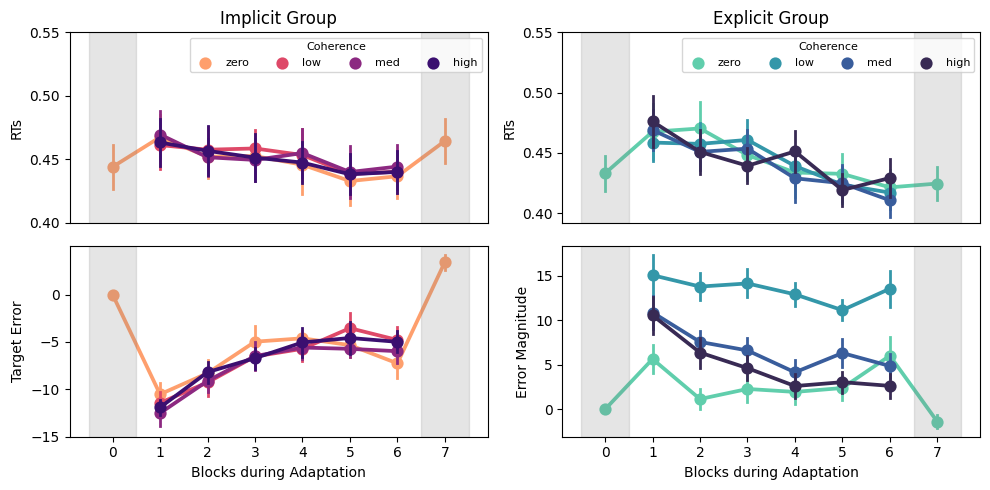

In [15]:

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

# Plot behavior for group 0 (RTs) with Magma palette
sns.pointplot(x="block", y="reach_rt", hue="coh_cat", data=df_data_group0_avg, errorbar="se", ax=axes[0, 0], palette="magma_r", errwidth=2)
axes[0, 0].set_xlabel("")
axes[0, 0].set_yticks(np.arange(0.40, 0.55, .05))
axes[0, 0].set_ylabel("RTs")
axes[0, 0].set_title("Implicit Group")
# remove x ticks
axes[0, 0].set_xticks([])
axes[0, 0].legend(loc='upper right', title="Coherence", ncols=4, fontsize=8, title_fontsize=8)
# Add shaded boxes
axes[0, 0].axvspan(-0.5, 0.5, color='gray', alpha=0.2)
axes[0, 0].axvspan(6.5, 7.5, color='gray', alpha=0.2)

# Plot behavior for group 1 (RTs)
sns.pointplot(x="block", y="reach_rt", hue="coh_cat", data=df_data_group1_avg, errorbar="se", ax=axes[0, 1], palette="mako_r", errwidth=2)
axes[0, 1].set_xlabel("")
axes[0, 1].set_ylabel("RTs")
axes[0, 1].set_yticks(np.arange(0.40, 0.55, .05))
axes[0, 1].set_title("Explicit Group")
axes[0, 1].set_xticks([])
axes[0, 1].legend(loc='upper right', title="Coherence", ncols=4, fontsize=8, title_fontsize=8)
# Add shaded boxes
axes[0, 1].axvspan(-0.5, 0.5, color='gray', alpha=0.2)
axes[0, 1].axvspan(6.5, 7.5, color='gray', alpha=0.2)

# Plot behavior for group 0 (Errors)
sns.pointplot(x="block", y="reach_vis_err_corrected", hue="coh_cat", data=df_data_group0_avg, errorbar="se", ax=axes[1, 0], palette="magma_r", errwidth=2)
axes[1, 0].set_xlabel("Blocks during Adaptation")
axes[1, 0].set_yticks(np.arange(-15, 1, 5))
axes[1, 0].set_ylabel("Target Error")
# Add shaded boxes
axes[1, 0].axvspan(-0.5, 0.5, color='gray', alpha=0.2)
axes[1, 0].axvspan(6.5, 7.5, color='gray', alpha=0.2)

# Plot behavior for group 1 (Errors)
sns.pointplot(x="block", y="reach_vis_abs_err_corrected", hue="coh_cat", data=df_data_group1_avg, errorbar="se", ax=axes[1, 1], palette="mako_r", errwidth=2)
axes[1, 1].set_yticks(np.arange(0, 20, 5))
axes[1, 1].set_xlabel("Blocks during Adaptation")
axes[1, 1].set_ylabel("Error Magnitude")
# Remove the legends
axes[1, 0].get_legend().remove()
axes[1, 1].get_legend().remove()
# Add shaded boxes
axes[1, 1].axvspan(-0.5, 0.5, color='gray', alpha=0.2)
axes[1, 1].axvspan(6.5, 7.5, color='gray', alpha=0.2)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()


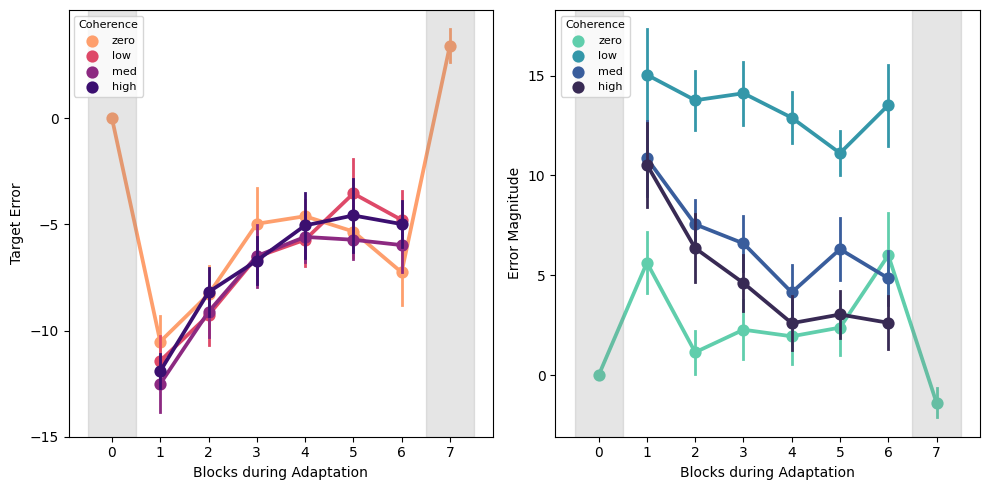

In [16]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot behavior for group 0 (Errors)
sns.pointplot(x="block", y="reach_vis_err_corrected", hue="coh_cat", data=df_data_group0_avg, errorbar="se", ax=axes[0], palette="magma_r", errwidth=2)
axes[0].set_xlabel("Blocks during Adaptation")
axes[0].set_yticks(np.arange(-15, 1, 5))
axes[0].set_ylabel("Target Error")
# Add shaded boxes
axes[0].axvspan(-0.5, 0.5, color='gray', alpha=0.2)
axes[0].axvspan(6.5, 7.5, color='gray', alpha=0.2)
# legend on top left
axes[0].legend(loc='upper left', title="Coherence", fontsize=8, title_fontsize=8)

# Plot behavior for group 1 (Errors)
sns.pointplot(x="block", y="reach_vis_abs_err_corrected", hue="coh_cat", data=df_data_group1_avg, errorbar="se", ax=axes[1], palette="mako_r", errwidth=2)
axes[1].set_yticks(np.arange(0, 20, 5))
axes[1].set_xlabel("Blocks during Adaptation")
axes[1].set_ylabel("Error Magnitude")
# Remove the legends
# axes[1].get_legend().remove()
# Add shaded boxes
axes[1].axvspan(-0.5, 0.5, color='gray', alpha=0.2)
axes[1].axvspan(6.5, 7.5, color='gray', alpha=0.2)
# legend on top left
axes[1].legend(loc='upper left', title="Coherence", fontsize=8, title_fontsize=8)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()


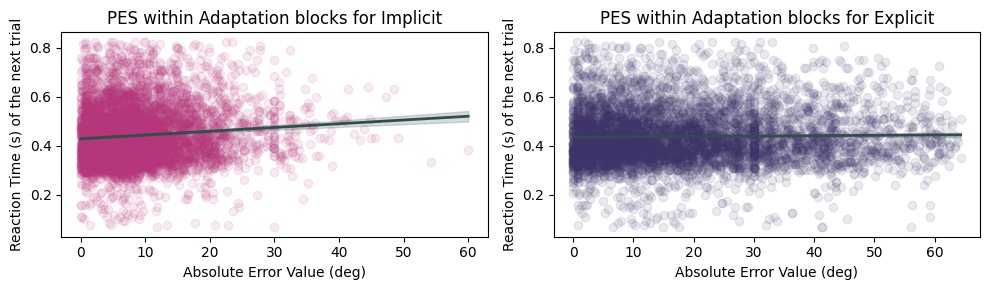

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Load the data
df = pd.read_csv("C:/Users/qmoreau/Documents/adapt_blk_data_PES.csv")
df = df.dropna()

groups = df['group'].unique()
colors = [palette1[2], palette0[1]]
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Reverse the order of axes
axes = axes.flatten()[::-1]

# Plot scatter points and regression line for each group
for ax, color, group in zip(axes, colors, groups):

    group_data = df[df['group'] == group]
    ax.scatter(group_data['reach_error_abs'], group_data['reach_rt'], alpha=0.1, label=group, color=color)

    # Fit linear model using statsmodels
    X = group_data['reach_error_abs']
    y = group_data['predicted_reach_rt']
    X_const = sm.add_constant(X)
    model = sm.OLS(y, X_const).fit()

    # Plot regression line
    X_fit = np.linspace(X.min(), X.max(), 100)
    X_fit_const = sm.add_constant(X_fit)
    y_fit = model.predict(X_fit_const)
    ax.plot(X_fit, y_fit, color='darkslategrey', linewidth=2)

    # Calculate confidence intervals with a 99% confidence level
    predictions = model.get_prediction(X_fit_const)
    prediction_summary_frame = predictions.summary_frame(alpha=0.0001)  # Set alpha to 0.01 for 99% confidence intervals
    y_lower = prediction_summary_frame['mean_ci_lower']
    y_upper = prediction_summary_frame['mean_ci_upper']

    # Plot the confidence interval as a shaded area
    ax.fill_between(X_fit, y_lower, y_upper, color='darkslategrey', alpha=0.2)

    # Customize plot
    ax.set_xlabel("Absolute Error Value (deg)")
    ax.set_ylabel("Reaction Time (s) of the next trial")
    ax.set_title(f"PES within Adaptation blocks for {group}")

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


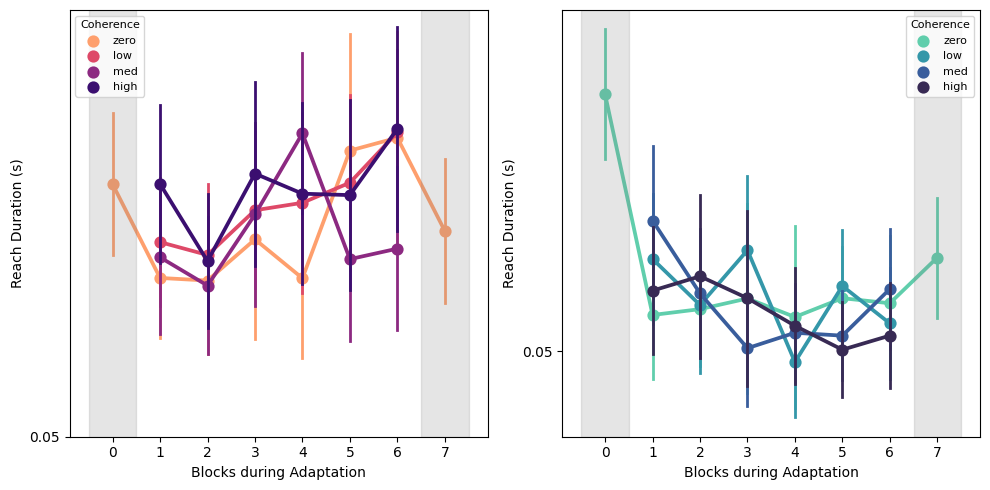

In [18]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot behavior for group 0 (Errors)
sns.pointplot(x="block", y="reach_dur", hue="coh_cat", data=df_data_group0_avg, errorbar="se", ax=axes[0], palette="magma_r", errwidth=2)
axes[0].set_xlabel("Blocks during Adaptation")
axes[0].set_yticks(np.arange(0.05, 0.1, 0.25))
axes[0].set_ylabel("Reach Duration (s)")
# Add shaded boxes
axes[0].axvspan(-0.5, 0.5, color='gray', alpha=0.2)
axes[0].axvspan(6.5, 7.5, color='gray', alpha=0.2)
# legend on top left
axes[0].legend(loc='upper left', title="Coherence", fontsize=8, title_fontsize=8)

# Plot behavior for group 1 (Errors)
sns.pointplot(x="block", y="reach_dur", hue="coh_cat", data=df_data_group1_avg, errorbar="se", ax=axes[1], palette="mako_r", errwidth=2)
axes[1].set_yticks(np.arange(0.05, 0.1, 0.25))
axes[1].set_xlabel("Blocks during Adaptation")
axes[1].set_ylabel("Reach Duration (s)")
# Remove the legends
# axes[1].get_legend().remove()
# Add shaded boxes
axes[1].axvspan(-0.5, 0.5, color='gray', alpha=0.2)
axes[1].axvspan(6.5, 7.5, color='gray', alpha=0.2)
# legend on top left
axes[1].legend(loc='upper right', title="Coherence", fontsize=8, title_fontsize=8)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()
